#Step 7
Context generation

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentContextual import EnvironmentContextual
from Code.environment.Customer import Customer
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.ContextManager import ContextManager

%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
arms = settings.prices

environment = EnvironmentContextual(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm = environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [==============================] 99.6%
 {(0, 0): [3, 3, 1, 2, 0], (0, 1): [3, 2, 3, 3, 0], (1, 0): [3, 2, 1, 0, 3], (1, 1): [3, 2, 3, 1, 0]} {(0, 0): 461.26611136000014, (0, 1): 651.1317304319999, (1, 0): 362.39580841599997, (1, 1): 1755.0893731840006} {(0, 0): 4.6126611136000015, (0, 1): 6.511317304319999, (1, 0): 3.62395808416, (1, 1): 17.550893731840006} dict_values([{(0, 0, 0, 0, 0): 96.17792644000002, (0, 0, 0, 0, 1): 46.33627384000001, (0, 0, 0, 0, 2): 95.22188848000002, (0, 0, 0, 0, 3): 100.42837120000002, (0, 0, 0, 1, 0): 116.10535970000002, (0, 0, 0, 1, 1): 65.12354070000002, (0, 0, 0, 1, 2): 115.07746340000003, (0, 0, 0, 1, 3): 120.38837300000003, (0, 0, 0, 2, 0): 138.99162112000005, (0, 0, 0, 2, 1): 87.09598712000002, (0, 0, 0, 2, 2): 137.88782224, (0, 0, 0, 2, 3): 143.277052, (0, 0, 0, 3, 0): 120.15945496000002, (0, 0, 0, 3, 1): 69.39589216000002, (0, 0, 0, 3, 2): 119.12447872, (0, 0, 0, 3, 3): 124.40928160000001, (0, 0, 1, 0, 0): 136.49656180000002, (0, 0, 1, 0, 1

In [3]:
clairvoyant_arms

{(0, 0): [3, 3, 1, 2, 0],
 (0, 1): [3, 2, 3, 3, 0],
 (1, 0): [3, 2, 1, 0, 3],
 (1, 1): [3, 2, 3, 1, 0]}

In [4]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

CONTEXT_INTERVAL = 14
TIME_HORIZON = 300
NUM_ITERATION = 1

In [5]:
#unknown parameters
alphas = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #uniform
prods_dist = np.ones((n_products,n_arms))   #all 1

customers = copy.deepcopy(environment.customers)

for customer in customers:
    customer.set_distribution_alpha(alphas)
    customer.set_num_prods(prods_dist)

UCB

In [6]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb4_learner = ContextManager(UCBLearner4, n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % CONTEXT_INTERVAL == 0:
            ucb4_learner.build_context()
            print(str(ucb4_learner.tree))
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb4_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb4_learner.update(super_arm.copy(), report)
    rewards = ucb4_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
-1<None, None>
loading: [                              ] 0.0%{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [3, 3, 

{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
loading: [========                      ] 26.7%{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 

{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
loading: [===============               ] 50.0%{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
1<0<-1<None, None>, -1<None, None>>, 0<-1<None, None>, -1<None, None>>>
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3

{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
1<0<-1<None, None>, -1<None, None>>, -1<None, None>>
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 3, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 3, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 3, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 3, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 3, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 3, 2]}
loading: [=======================       ] 76.7%{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 3, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3

{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}
{(0, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 2], (1, 0): [3, 3, 1, 3, 3], (1, 1): [3, 3, 3, 1, 2]}


(1, 300)

In [7]:
ucb4_learner.build_context()
str(ucb4_learner.tree)

'1<0<-1<None, None>, -1<None, None>>, 0<-1<None, None>, -1<None, None>>>'

In [11]:
features_list = list(clairvoyant_arms.keys())
rewards_iterations_tmp = {}
for features in features_list:
    rewards_iterations_tmp[features] = [[val[features] for val in row] for row in rewards_iterations]
rewards_iterations = rewards_iterations_tmp

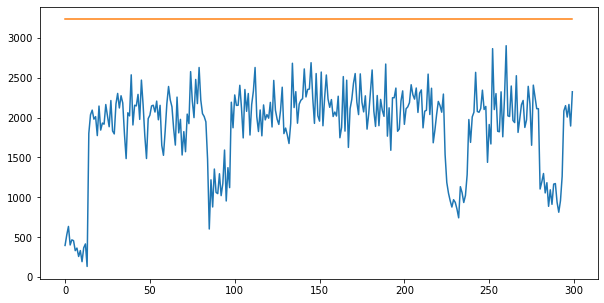

In [9]:
agg_r = ucb4_learner.aggregate_rewards
tot_clairvoyant = sum(list(clairvoyant_reward.values()))
plt.figure(figsize=(10, 5))
plt.plot(range(len(agg_r)), agg_r)
plt.plot(range(len(agg_r)), [tot_clairvoyant] * len((agg_r)))
plt.show()

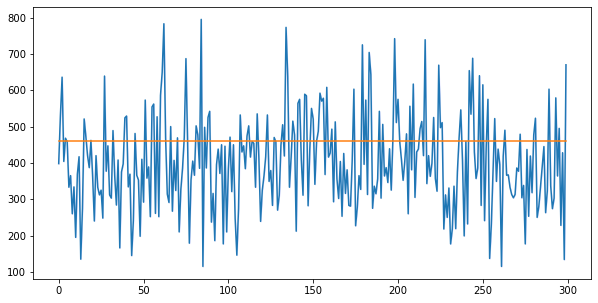

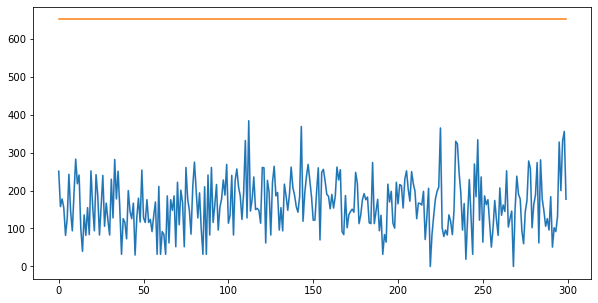

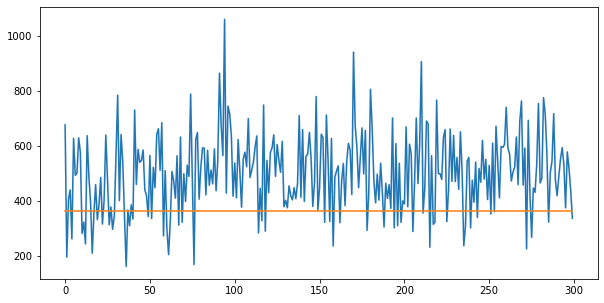

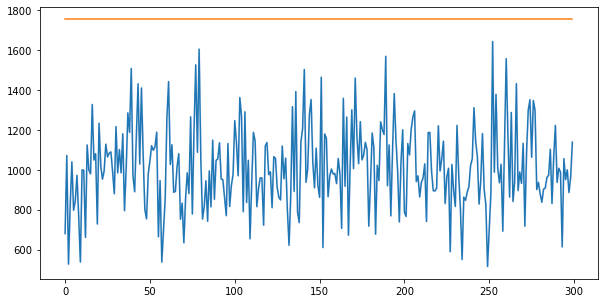

In [12]:
for features in features_list:
    plt.figure(figsize=(10, 5))

    mean = np.mean(rewards_iterations[features], axis=0)
    stdev = np.std(rewards_iterations[features], axis=0)

    plt.plot(range(len(mean)), mean)
    plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

    plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward[features] for _ in range(len(rewards))])
    plt.show()


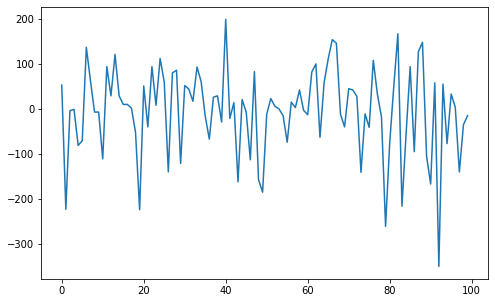

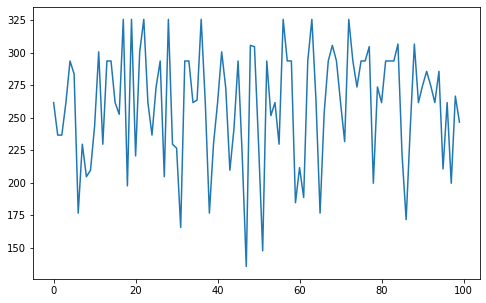

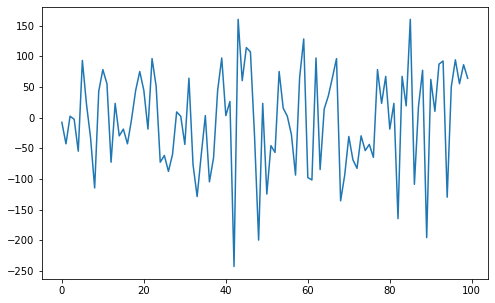

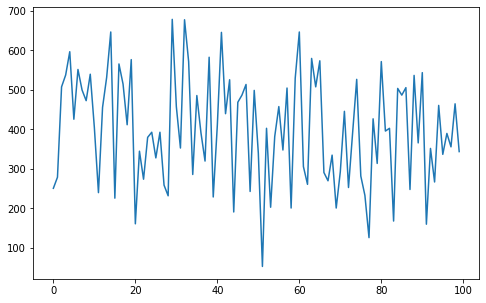

In [10]:
for features in features_list:
    plt.figure(figsize=(8,5))

    regret = clairvoyant_reward[features] - rewards_iterations[features]
    mean_regret = np.mean(regret, axis=0)

    plt.plot(range(len(mean_regret)), mean_regret)
    plt.show()

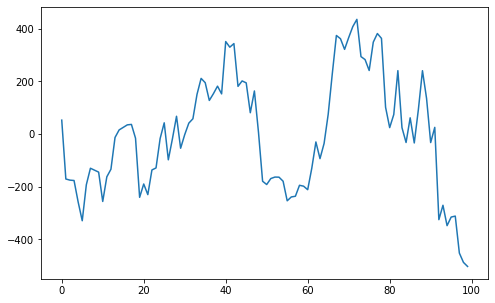

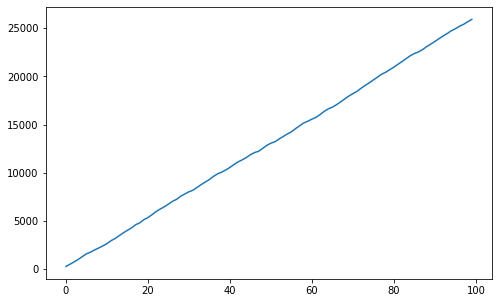

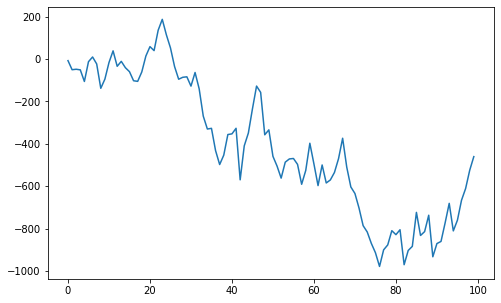

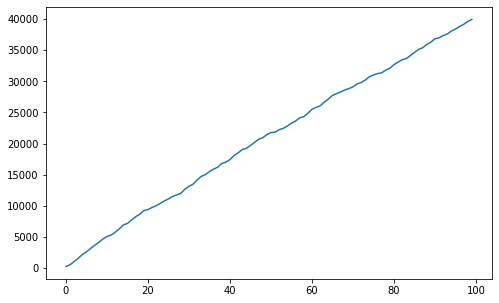

In [11]:
for features in features_list:
    plt.figure(figsize=(8,5))
    regret = clairvoyant_reward[features] - rewards_iterations[features]
    cumulative_regret = np.cumsum(regret, axis=1)
    cum_reg_mean = np.mean(cumulative_regret, axis=0)

    plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
    plt.show()

TS

In [12]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner4 = ContextManager(TSLearner4, n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 14 == 0:
            ts_learner4.build_context()
            print(str(ts_learner4.tree))

        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner4.select_superarm()
        report = environment.round(super_arm)
        ts_learner4.update(super_arm.copy(), report)
    rewards = ts_learner4.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

current: 32.89733903657843 - best: 43.20585816664435
current: 35.66254323493448 - best: 43.20585816664435

Iteration # 1
current: 28.229366854029614 - best: 34.57783915879718
current: 29.165458559531487 - best: 34.57783915879718
-1<None, None>
loading: [===                           ] 10.0%current: 103340.2688909887 - best: 28.40631425684664
current: 79572.82293838759 - best: 103340.2688909887
0<-1<None, None>, -1<None, None>>
loading: [======                        ] 20.0%current: 13141.437425702508 - best: 27.437595413174286
current: 21554.526907724274 - best: 13141.437425702508
current: 39957.25549300817 - best: 29.6150707795334
current: 53180.875493910564 - best: 23079.614323161702
1<0<-1<None, None>, -1<None, None>>, 0<-1<None, None>, -1<None, None>>>
loading: [============                  ] 40.0%current: 29.263142053699113 - best: 31.903723811775563
current: 34.15629357593304 - best: 31.903723811775563
current: 58.784416226015296 - best: 33.5978280933088
current: 9832.5737198228

/home/tpoppo/Documenti/GitHub/OLA_project/Code/ReportSimulation.py:79: RuntimeWarning: invalid value encountered in long_scalars
  return self.reward(prices) / num_customers


loading: [========================      ] 80.0%current: 29.596001282088253 - best: 32.68797082080327
current: 34.209649813253776 - best: 32.68797082080327
current: 29.28816637661277 - best: 31.275003793130473
current: 34.41992520648341 - best: 36.45906621034482
1<-1<None, None>, -1<None, None>>
loading: [===========================   ] 90.0%current: 30.137226569834844 - best: 32.25406589365405
current: 34.25907447707419 - best: 32.25406589365405
current: 28.401986999508285 - best: 31.080481187583324
current: 34.690358524132776 - best: 36.75400689845732
1<-1<None, None>, -1<None, None>>


(1, 100)

In [13]:
features_list = list(clairvoyant_arms.keys())
rewards_iterations_tmp = {}
for features in features_list:
    rewards_iterations_tmp[features] = [[val[features] for val in row] for row in rewards_iterations]
rewards_iterations = rewards_iterations_tmp

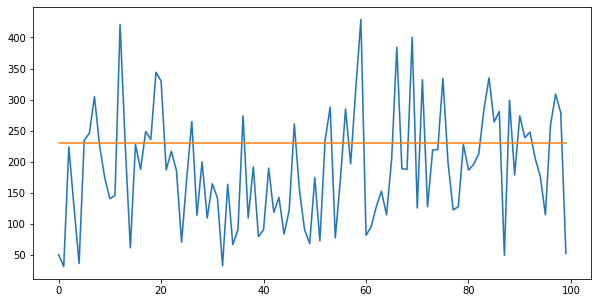

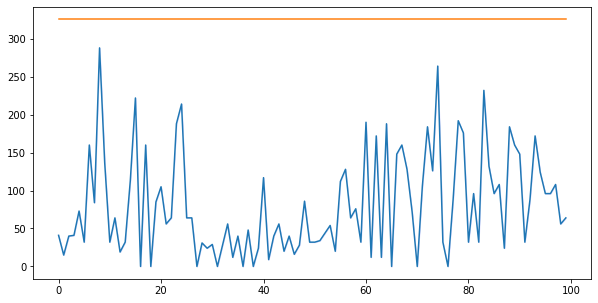

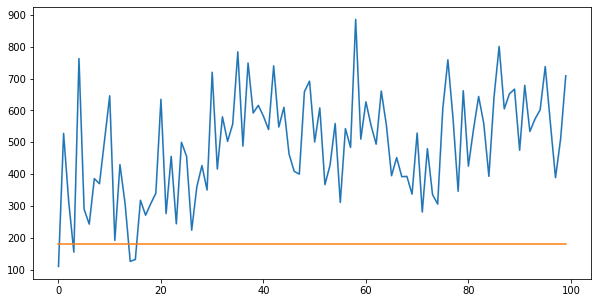

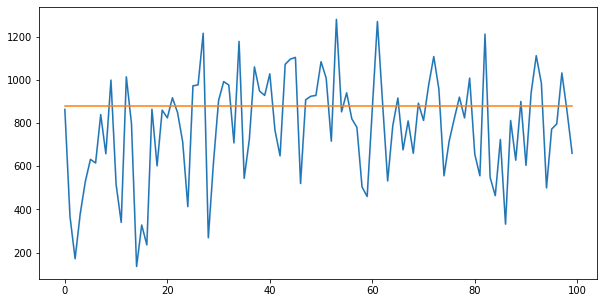

In [14]:
for features in features_list:
    plt.figure(figsize=(10, 5))
    mean = np.mean(rewards_iterations[features], axis=0)
    stdev = np.std(rewards_itera<tions[features], axis=0)

    plt.plot(range(len(mean)), mean)
    plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

    plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward[features] for _ in range(len(rewards))])
    plt.show()

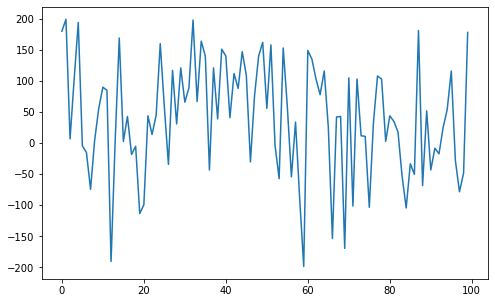

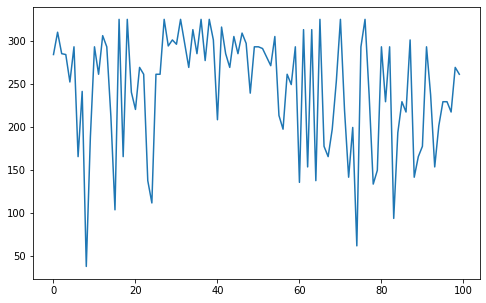

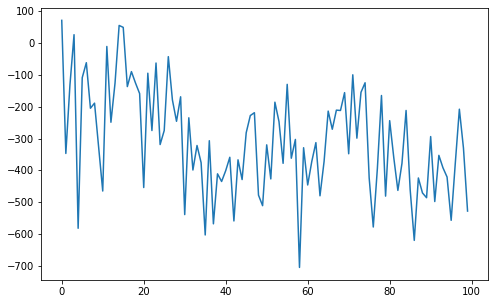

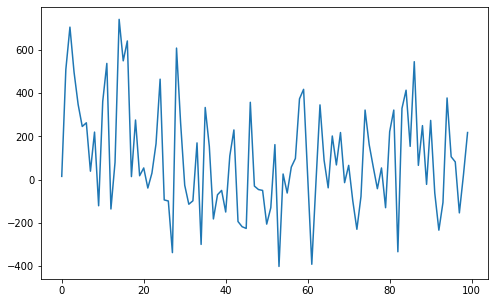

In [15]:
for features in features_list:
    plt.figure(figsize=(8,5))

    regret = clairvoyant_reward[features] - rewards_iterations[features]
    mean_regret = np.mean(regret, axis=0)

    plt.plot(range(len(mean_regret)), mean_regret)
    plt.show()

In [16]:
a = np.mean(regret[:,200:], axis=0)
np.shape(a)
print(np.mean(a))

nan


/home/tpoppo/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tpoppo/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


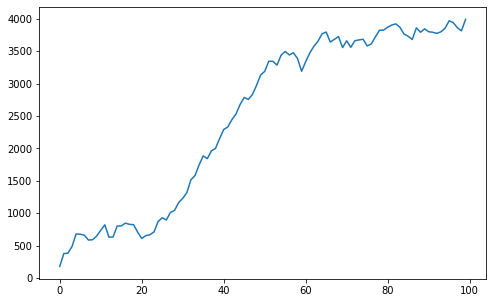

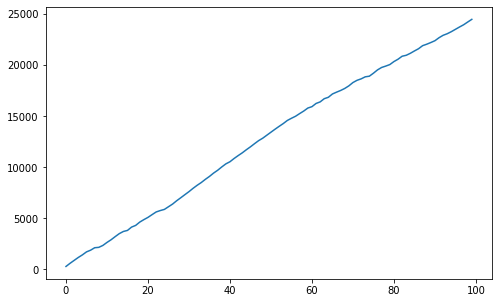

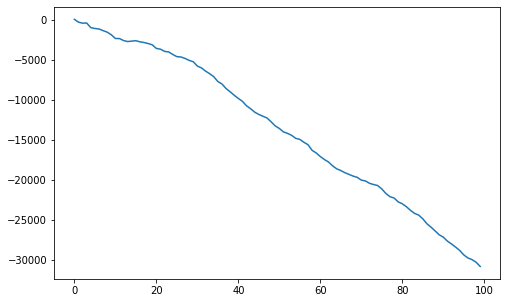

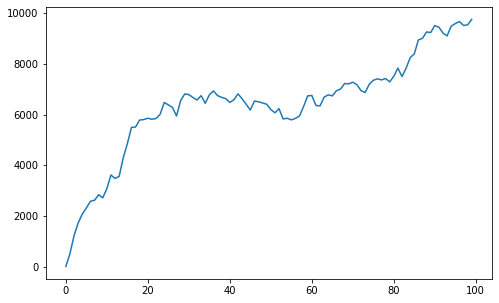

In [17]:
for features in features_list:
    plt.figure(figsize=(8,5))
    regret = clairvoyant_reward[features] - rewards_iterations[features]
    cumulative_regret = np.cumsum(regret, axis=1)
    cum_reg_mean = np.mean(cumulative_regret, axis=0)

    plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
    plt.show()